 #  Определение потенциально популярных компьютерных игр  с целью  планирования  рекламных кампаний ( выявление закономерностей, определяющих успешность игры )

Описание проекта: Нам представлен набор данных, который несет в себе информацию из открытых источников. Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы  до 2016 года.

Цель проекта: 
+ выявить определяющие успешность игры закономерности
+ составить прогноз на 2017 год по наиболее  прибыльным играм
+ проверить заданые гипотезы

План анализа: Согласно инструкции в задании к проекту


## Шаг. Общая информация о полученных данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats as st
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод:
Представленные данные  имеют пропуски, неправильные названия столбцов и типы данных.Необходимо провести преподготовку данных.

## Шаг. Подготовка данных

### Замените названия столбцов (приведите к нижнему регистру)

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.columns.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

### Преобразуйте данные в нужные типы.
Опишите, в каких столбцах заменили тип данных и почему;


In [7]:
# Преобразуем данные в столбце дата релиза. 
#(прежде чем поменяем тип данных удалим игры с пустым годом релиза,
# их небольшое количество, поэтому они не повлияют на результат)

df.drop(df[df['year_of_release'].isnull()].index, inplace=True)
df['year_of_release'] = df['year_of_release'].astype('int')
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year
df['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16446, dtype: int64

In [8]:
# Проверим данные в столбце  пользовательский рейтинг.
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
#tbd — сокращение от To Be Determined. Служит для отметки неясностей или пропусков, которые надо заполнить.
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Заполняем пропуски

Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;


In [10]:
# Доля пропусков в %.
df.isna().mean()*100

name                0.012161
platform            0.000000
year_of_release     0.000000
genre               0.012161
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.459321
user_score         54.621184
rating             40.605618
dtype: float64

In [11]:
# В столбце названия пропуски критичны и при этом их всего около 1%. Поэтому удаляем.
df.drop(df[df['name'].isnull()].index, inplace=True)
df['name'].isna().sum()

0

In [12]:
# В столбце рейтинг от организации ESRB тип данных  строка, поэтому заменим пропуски на 'unknow'
df['rating'] = df['rating'].fillna('unknow')
#df.head()

В столбцах оценка критиков и оценка пользователей:
+ Во-первых, значительная доля пропусков, поэтому удалять нежелательно
+ Во-вторых, замена их какими-либо значениями будет некорректна (может исказить результат анализа)

In [13]:
df.loc[ df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknow
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknow
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknow
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknow
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknow
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknow
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknow
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknow
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknow


Пропуски скорее всего связаны с алгоритмом сбора данных конкретными источниками, т.к. пропуски в одних и тех же строчках.

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [14]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknow,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknow,31.38


### Вывод: 
при подготовке данных к анализу было сделано:
+ заполненны пропуски
+ во всех клонках установлен правильный тип данных
+ заменено значение 'tbd' на Nan в колонке 'user_score'
+ были посчитаны суммарные мировые продажи.

## Шаг. Исследовательский анализ данных

### Количество игр выпускавшихся в разные годы.

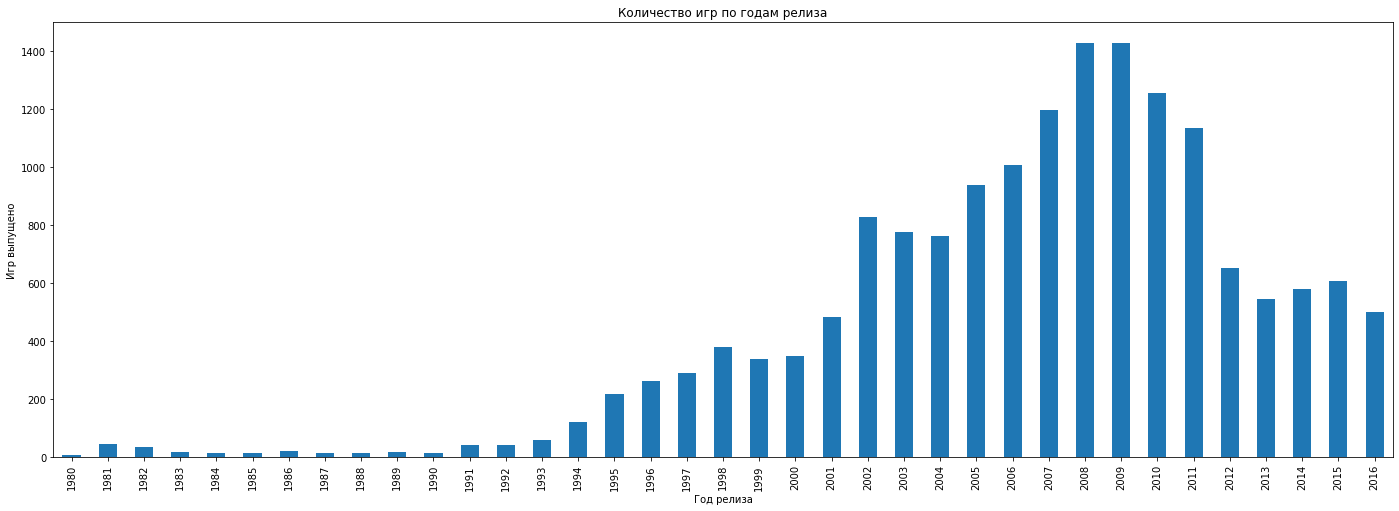

In [15]:
df.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', figsize=(24,8))
plt.title('Количество игр по годам релиза')
plt.ylabel('Игр выпущено')
plt.xlabel('Год релиза')
plt.show()

На графике распределения отчетливо видны периоды активности. Так с 2012 по 2016 устоновился однородный
уровень. Поэтому правильно будет рассмотреть именно этот период. Но в силу динамичности рынка
сократим его до трех лет
+ Актуальный период 2014-2016 год

### Продажи по платформам

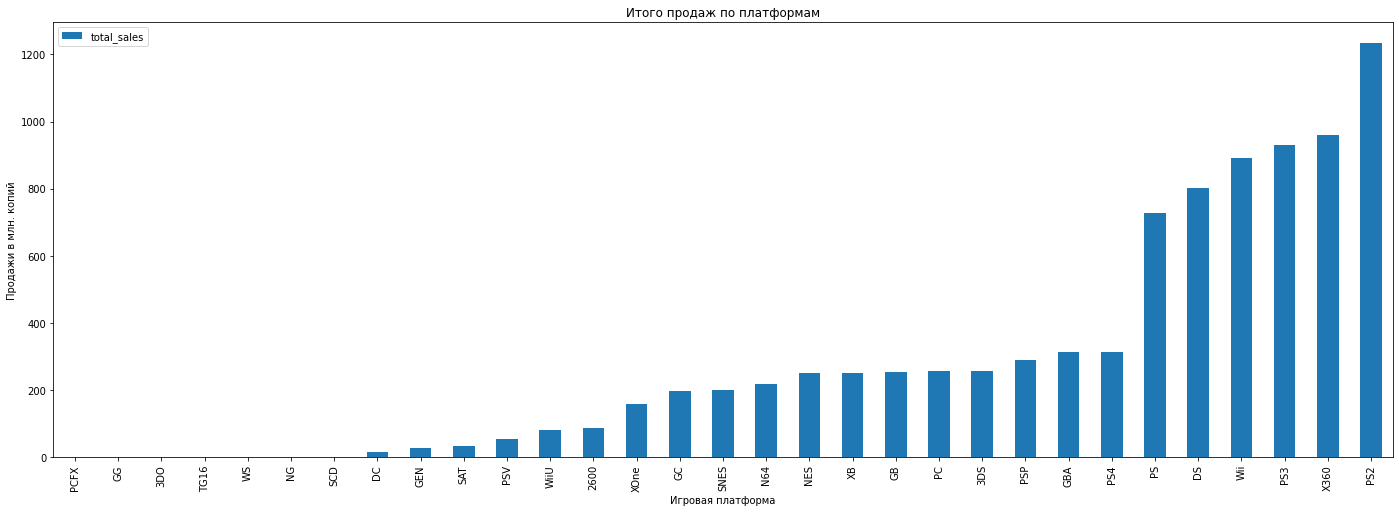

In [16]:
platforms = (df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales'))
platforms.plot(kind='bar', figsize=(24,8))
plt.title('Итого продаж по платформам')
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Игровая платформа')
plt.show()

Платформы с наибольшими суммарными продажами. Выделяются шесть крайних правых платформ, их и будем анализировать

In [17]:
platf = platforms['total_sales'].sort_values( ascending=False)[0:6].index
games_platforms = df.query('platform in @platf')
#games_platforms.head()

### Распределением продаж по платформам и по годам, 


In [18]:
b = games_platforms.pivot_table(index= 'year_of_release',
                                columns='platform',
                                values='total_sales',
                                aggfunc='sum')

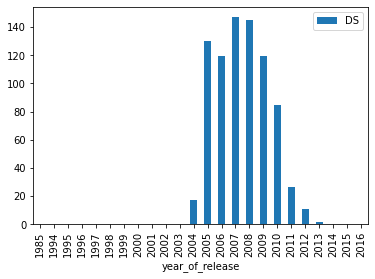

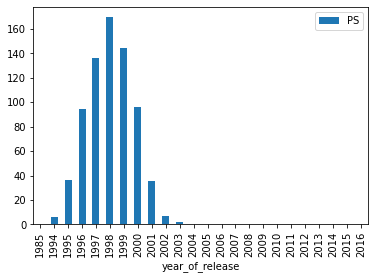

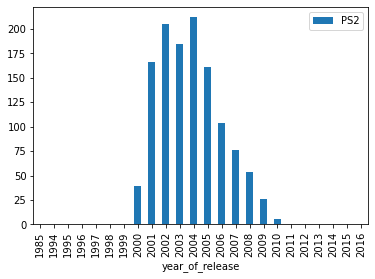

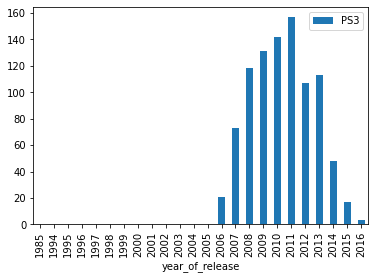

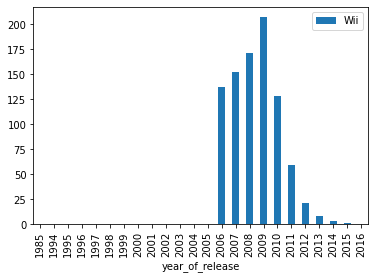

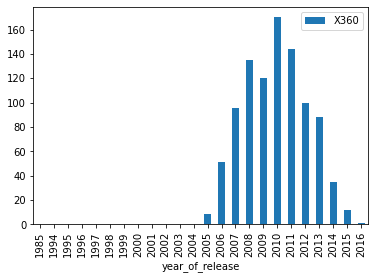

In [19]:
def grafic(i):
    b.plot(y=i, kind='bar')
    plt.show()
    plt.close()
for i in b.columns:
    grafic(i)
   

Распределение активности нормальное(купол). Платформы постепенно повышали продажи, достигали своего пика и потом начинали угасать. Характерный срок(жизненый цикл), когда появляются новые и исчезают старые платформы 8-10 лет.

### Прогноз на 2017 год
Ранее мы определили актуальный период : последние пять лет, 2012-2016 года.(Схожие характеристики активности)

In [20]:
# Выделяем актуальный период
period = df.loc[(df['year_of_release'] <= 2016) &  (df['year_of_release'] >= 2014)]
# Прибыль в этот период по платформам
period.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

Изучим данные по 5 самым прибыльным платформам

In [21]:
def platform_sales(data, my_list,n,m, ysize):
    temp = period.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
    plt.subplots(n,m,figsize=(15,ysize))
    i = 1
    for platform in my_list:
        ax = plt.subplot(n,m,i)
        l = list(temp.query('platform==@platform').index.get_level_values(1))
        temp.query('platform==@platform').plot(kind='bar', ax=ax, label=platform)
        plt.legend()
        plt.xlabel(platform)
        i+=1
        ax.set_xticklabels(l)
    plt.tight_layout()

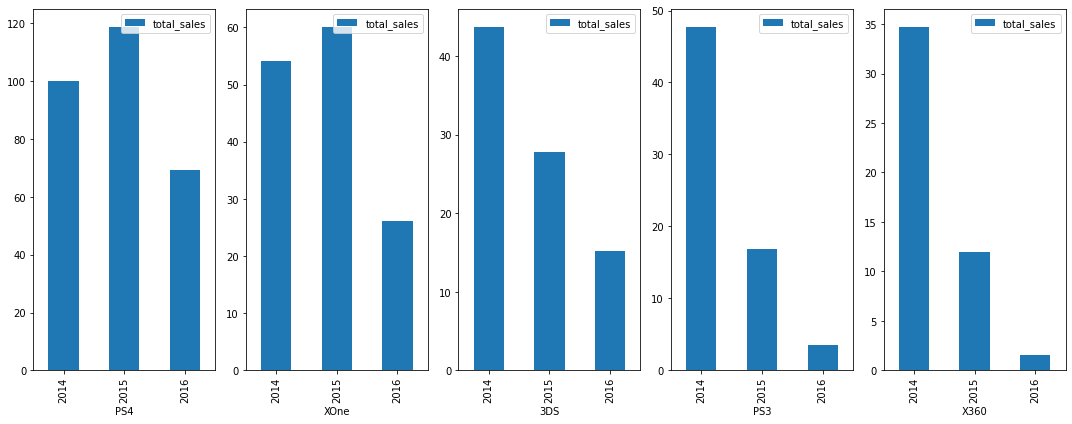

In [22]:
top = period.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index[0:5]
top5 = period.query('platform in @top')
platform_sales(top5, top, 1, 5, 6)

На графиках прослеживается тенденция к снижениюю Особенно по старым платформам, который находятся на стадии завершения жизненого цикла. Потенциально прибыльными в 2017 году могут остаться: PS4, 3DS и XOne.

### Анализ продаж игр

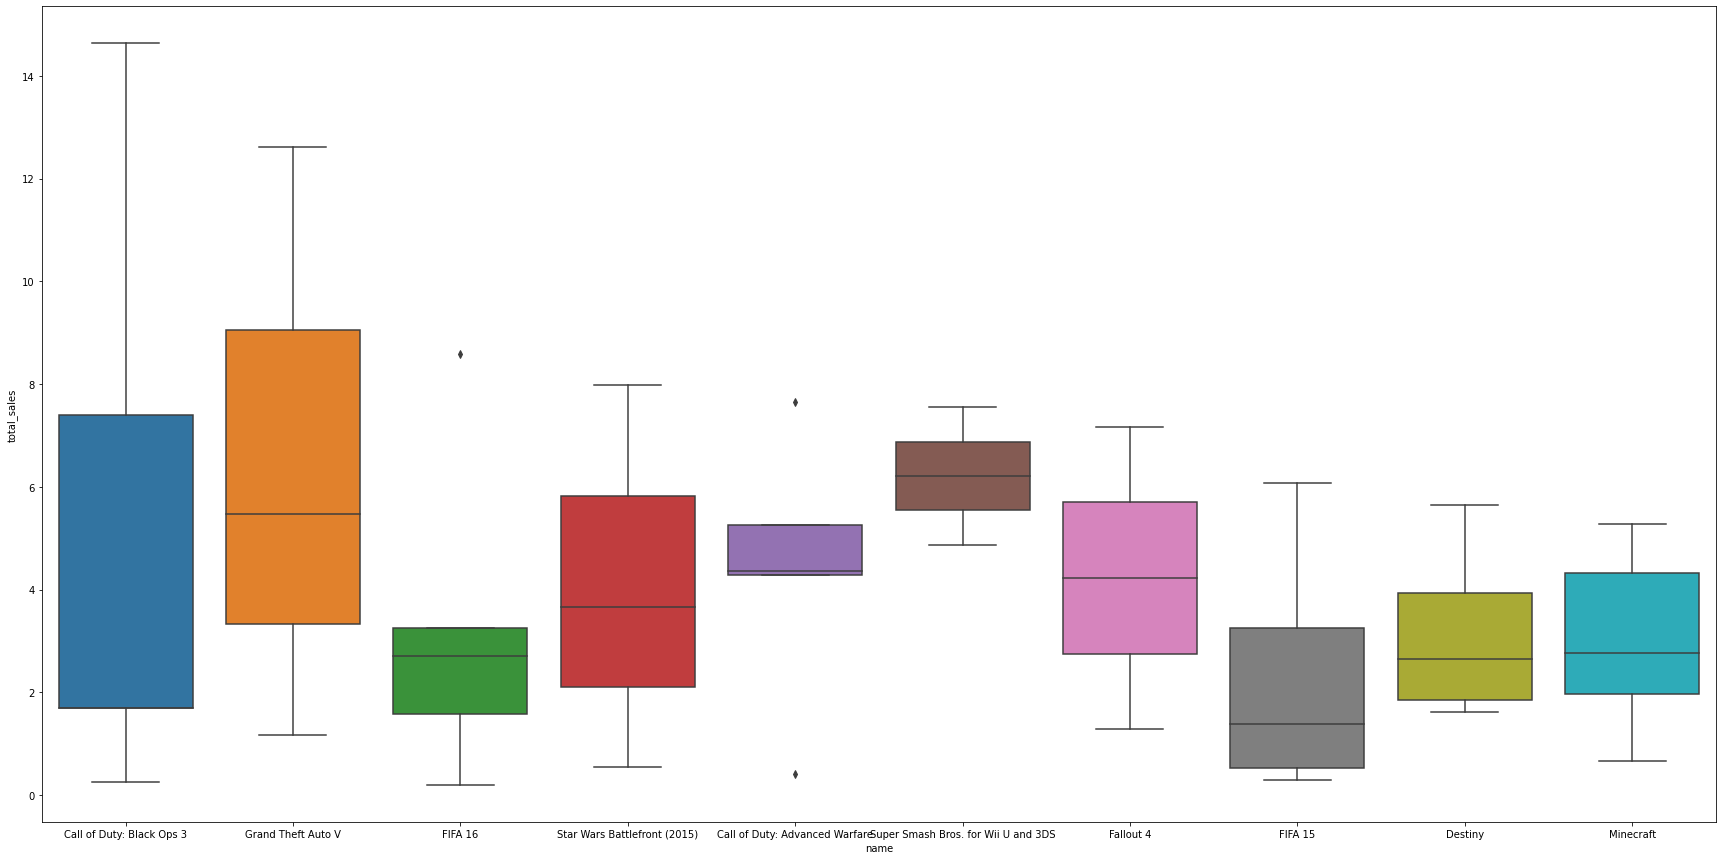

In [23]:
# Отберем 10 самых продоваемых игр, как наиболее показательные
top_games = period.groupby('name')['total_sales'].sum().sort_values(ascending=False)[0:10]
# Построем график «ящик с усами» по глобальным продажам игр
plt.figure(figsize=(30,15))
sb.boxplot(data=period.query('name in @top_games.index'), x='name', y='total_sales')
plt.show()

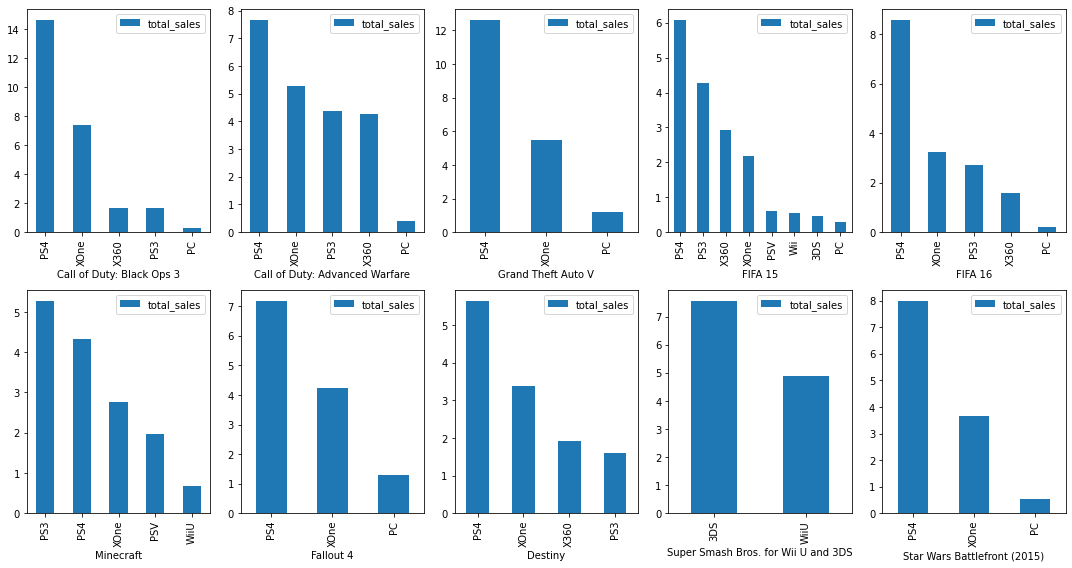

In [24]:
# Продажи игр в разбивке по платформам
plt.subplots(2,5,figsize=(15,8))
i = 1
for game in top_games.index:
    ax=plt.subplot(2,5,i)
    period.query('name==@game').plot(kind='bar', x='platform', y='total_sales', ax=ax)
    ax.set_xlabel(game)
    i += 1
plt.tight_layout()


Популярные игры имеют большие продажи на одних и тех же платформах

 Диаграмма размаха продажи популярных игр на популярных платформах

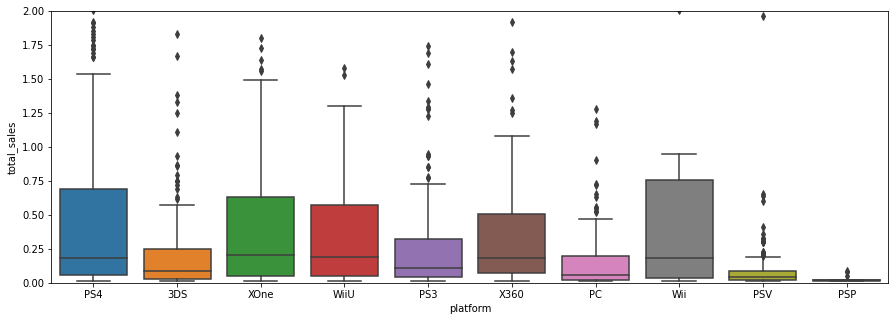

In [25]:
# Исправлено

#  все данные из актуального периода, без дополнительных фильтраций по платформам
kk = period.sort_values('total_sales', ascending=False)
plt.figure(figsize=(15,5))
sb.boxplot(data= kk, x='platform', y='total_sales')
plt.ylim(0,2)
plt.show()

In [26]:
# прежняя версия
#plt.figure(figsize=(15,5))
#sb.boxplot(data=top5, x='platform', y='total_sales')
#plt.ylim(0,2.2)
#plt.show()

Вывод подтвердился: самые прибыльные платформы выпускают самые популярные игры. А так как это относительное более современные платформы, очивидно связь популярности с технических возможностями, которые они предоставляют.

### Влияние  отзывов пользователей и критиков на продажи внутри одной популярной платформы

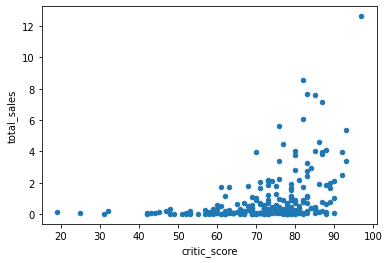

In [27]:
#  PS4
# оценка критиков 
period.query('platform=="PS4"').plot(kind='scatter', x='critic_score', y='total_sales')
plt.show()

In [28]:
# коэффициент корреляции
period.query('platform=="PS4"')['critic_score'].corr(period.query('platform=="PS4"')['total_sales'])

0.40266141068104083

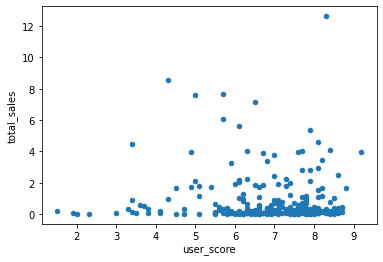

In [29]:
#  оценка пользователей 
period.query('platform=="PS4"').plot(kind='scatter', x='user_score', y='total_sales')
plt.show()

In [30]:
# коэффициент корреляции
period.query('platform=="PS4"')['user_score'].corr(period.query('platform=="PS4"')['total_sales'])

-0.040131589472697356

На популярность платформы оценки критиков оказывают слабое влияние, а оценки пользователей не влияют

### Продажи игр на других платформах

In [31]:
platforms = period['platform'].unique()
for platform in platforms:
    s = period.query('platform==@platform')
    print(platform,'=',s['critic_score'].corr(s['total_sales']));

PS4 = 0.40266141068104083
3DS = 0.314117492869051
XOne = 0.42867694370333226
WiiU = 0.370201412480884
PS3 = 0.44657460493190704
X360 = 0.5257228356581523
PC = 0.17463413769350036
Wii = nan
PSV = 0.04266490657009526
PSP = nan


In [32]:
platforms = period['platform'].unique()
for platform in platforms:
    s = period.query('platform==@platform')
    print(platform,'=',s['user_score'].corr(s['total_sales']));

PS4 = -0.040131589472697356
3DS = 0.2151932718527028
XOne = -0.0703839280647581
WiiU = 0.40792645792170773
PS3 = -0.16676141347662118
X360 = -0.138444570945665
PC = -0.07159665703472451
Wii = 1.0
PSV = -0.16845504978064446
PSP = nan


Вывод: 
+ Оценка критиков  слабо влияет на динамику продаж. 
+ Оценка пользователй в целом по всем платформам не оказывает влияния. 
Но в ситуации с платформой Wii ситуация абсолютной зависимости. Возможно, такой выбивающийся результат связан с ошибкой вводных данных.

### Распределение игр по жанрам

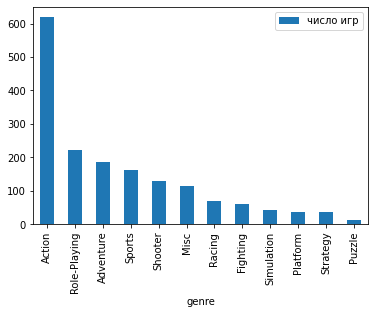

In [33]:
# Количество выпущенных игр по жанрам
period.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', label='число игр', legend=True)
plt.show()

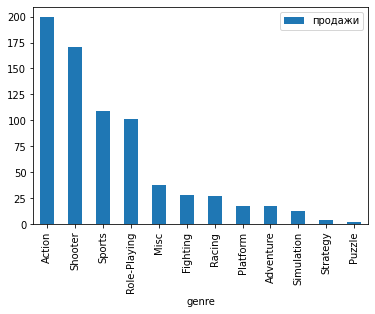

In [34]:
# Выручка от продаж
period.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', label='продажи', legend=True)
plt.show()


+ Жанр Action безусловный лидер как по количеству выпущеных игр так и по выручке от продаж.
+ Жанр Shooter второй по продажам, но лишь пятый по кол-ву выпущеных игр.
Это говорит о существовании нескольких супер продоваемых хитов.
+ Популярность остальных жанров более равномерно распределена, как по кол-ву, так и выручке


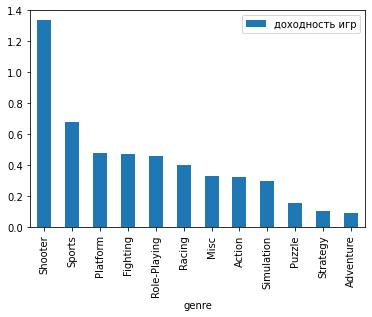

In [35]:
profit = period.groupby('genre')['total_sales'].sum() / period.groupby('genre')['name'].count()
profit = profit.sort_values(ascending=False)
profit.plot(kind='bar', label='доходность игр', legend=True)
plt.show()

Shoter - самых доходный жанр

### Вывод:
В процессе исследования были определены:
+ актуальный период с 2014 по 2016 годы
+ жизненый цикл платформ, около 10 лет
+ три потенциально перспективные платформы
+ самые продоваемые игры

Изучили влияние:
+ оценок критиков и пользователей на продажи

Выявили:
+ самые популярные жанры игр по количесту и продажам

Результат:
+ Самые доходные платформы PS4, 3DS и XOne
+ Самый доходный жанр Shoter
+ Самые популярные игры имеют реализацию на с

## Шаг. Составьте портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

<AxesSubplot:xlabel='platform'>

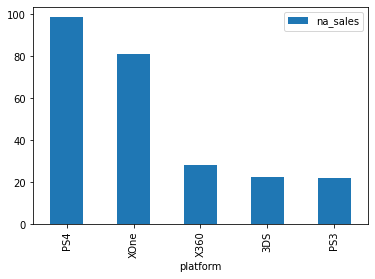

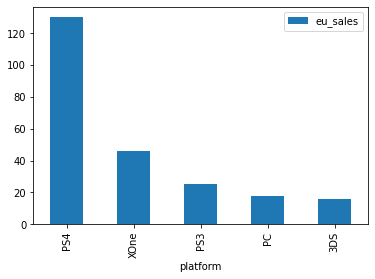

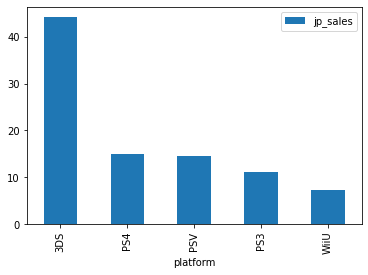

In [36]:
period.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
period.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
period.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

+ Популярность платформ Европе и Америке схожа. Популярность PC в разы выше других. Неплохую позицию в Америке занимает XOne.
+ в Японии в лидеры выходят другие платформы, особенно знаково лидерство DS. PC - лидер в других регионах, не входит даже в пятерку лидеров.

### Самые популярные жанры (топ-5)

<AxesSubplot:xlabel='genre'>

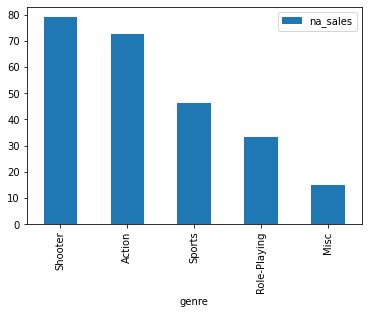

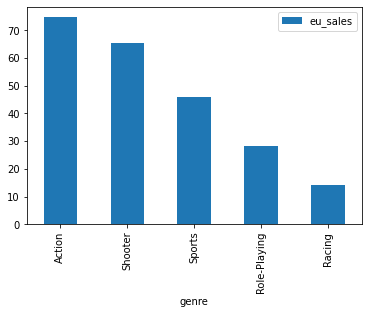

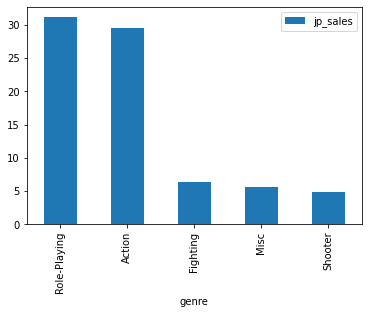

In [37]:
period.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
period.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
period.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

Рынок Европы и Америки схож по предпочтениям.
Рынок Японии выделяется. Жанр ролевых игр, который в других странах не является популярным, здесь занимает доминирующие положение( более чем в два раза)

### Влияение рейтинга ESRB на продажи в отдельном регионе

<AxesSubplot:xlabel='rating'>

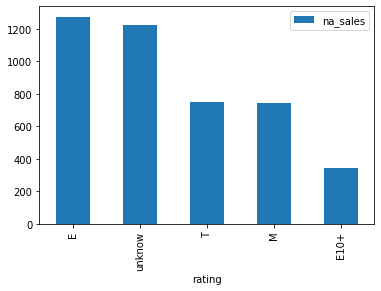

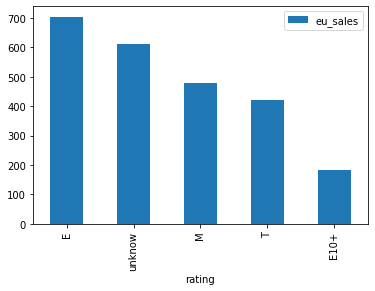

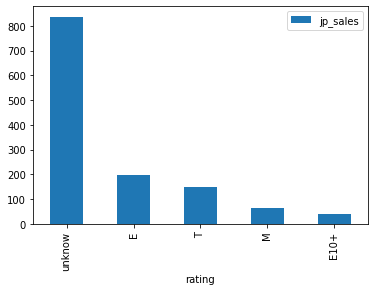

In [38]:
rating = df #df.loc[df['rating'] != 'unknow']
rating.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
rating.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
rating.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

+ Игры без ограничений по возрасту('E') занимают лидирующие положение во всех регионах.
+ В целом распределение игр по ESRB не зависит от региона. 
+ Болшая доля отсутствующих значений, особенно в Японии, могли сильно поменять тренды


### Вывод:


Проведя сравнение пользователей по регионам, выявлена значительные особености рынка Японии от других стран.
А вот по возрастым ограничениям популярность у игр без ограничений (по всем странам).

## Шаг. Проверка гипотез

+ Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
+ Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
+ Задайте самостоятельно пороговое значение alpha.
+ Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

Гипотезы:

+ H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый
+ H1: средний пользовательский рейтинг платформ Xbox One и PC различается

Так как сравниваемые выборки независимы между собой, используем t-критерий Стьюдента

In [39]:
# находим стандартное отклонение для каждого распределения
xbox = period[(period['platform'] == 'XOne') & (period['user_score'] > 0)]['user_score']
pc = period[(period['platform'] == 'PC') & (period['user_score'] > 0)]['user_score']
print(xbox.var(ddof=1))
print(pc.var(ddof=1))

1.8910066518847013
2.901154315133451


In [40]:
results = st.ttest_ind(xbox, pc, equal_var = False)
print('p-значение:', results.pvalue)

p-значение: 0.11601398086668832


In [41]:
# Проверяем гипотизу
alpha = 0.05

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Статистический тест показал, что гипотезу о равенстве среднего пользовательского рейтинга для XOne и PC не получилось отвергнуть. Пользователи одинаково оценивают платформы XOne и PC 

Гипотезы:

+ H0: средний пользовательский рейтинг жанров Action и Sports одинаковый
+ H1: средний пользовательский рейтинг жанров Action и Sports различается

In [42]:
# находим стандартное отклонение для каждого распределения
action = period[(period['genre'] == 'Action') & (period['user_score'] > 0)]['user_score']
sports = period[(period['genre'] == 'Sports') & (period['user_score'] > 0)]['user_score']

print(action.var(ddof=1))
print(sports.var(ddof=1))


1.8984766584766581
3.446979127609048


In [43]:
results = st.ttest_ind(action, sports, equal_var = False)
print('p-значение:', results.pvalue)

p-значение: 1.1825550382644557e-14


In [44]:
# Проверяем гипотизу
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports  различается.


### Вывод:


Проверено две гипотезы:

Средний пользовательский рейтинг платформ Xbox One и PC близки по значению. 
+ Пользователи одинаково хорошо оценивают эти платформы. И при продвижении  на это можно опереться, но только не на рынке Японии, где своя расстановка приоритетов.

Средние пользовательские рейтинги жанров Action и Sports  различается
+ Исходная гипотеза не подтвердилась: можно утверждать с уверенностью, что средние пользовательские рейтинги для жанров Action и Sports различаются. При выборе между продвижением игр двух жанров, при прочих равных условиях лучше отдать предпочтение жанру Sports.


Пояснения по проверке:
+ Для проверки используем метод t-критерий Стьюдента - сравниваемые выборки независимы между собой
+ Уровень значимость берем стандартный 5 %  -  иное не указано в условии и нет веских причин менять
+ При формулировани гипотез за нулевую берем утвердение о равнстве и ищем опровержения

## Шаг. Общий вывод

#### Мы исследовали данные:

Провели предобработку данных
+ заменили названия столбцов
+ преобразовали типы данных
+ заполнили пропуски данных
+ дополнили данные агрегированными показателями по продажам
+ проверили гипотизы на вероятность

Провели сравнительный анализ в разрезе влияния на продажи:
+ разлиных игровых платформ
+ жанров игр
+ играм
+ по влиянию оценок критиков и пользователей
+ возрастного рейтинга ESRB
+ а также рынков различных регионов


Выявили:
+ значимый период оценки (2012-2016)
+ ожидаемо прибыльные платформы (в зависимости от региона)
+ игры пользующиейся наибольшим спросом
+ отличия региональных рынков (особенно рынка Японии) 
+ жизненый цикл платформы (10 лет)

#### В результате мы можем сформулировать алгоритм для оценки перспективости товаров, это:
+ название игровой платформы и год  выпуска
+ жанр игры
+ возрастные ограничения
+ регион продажи
+ Оценоки пользователей на продажи это не оказывает влияния(можно не учитывать)
+ Отзывы критиков имеют слабое влияния и могут быть использованы для уточнения (при прочих равных)


#### Прогноз на 2017:

Игра должна быть разработана для платформ PS4 или XOne, если речь идет о западном рынке, и — для платформы 3DS, если игру планируется продавать в Японии.
Жанр: Action или Shooter для Запада, Role-Playing — для Японии.
Рейтинг ESRB: либо от 17 лет (для Америки и Европы) или от 13 лет (для Японии). Рейтинг от 6 лет и старше также будет хорошим выбором, но тогда набор жанров сужается.
Ориентироваться на оценки пользователей нет смысла, на продажи это не оказывает существенного влияния. Однако отзывы критиков не стоит упускать из внимания, их отзывы имеют значение. Стоит также отметить, что если пользовательский рейтинг все-таки будет важен создателям игры, то необходимо знать, что в жанре Sports рейтинг пользователей, как правило, выше, чем в жанре Action.